In [ ]:
pip install torch torchvision matplotlib


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google .colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/My Drive/machine learning/cifar10/train'
test_dir = '/content/drive/My Drive/machine learning/cifar10/test'

In [ ]:
# Image transformations (resize, convert to tensor, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # DenseNet expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load training data
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=32, shuffle=True)

# Load testing data
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False)


100%|██████████| 170M/170M [00:03<00:00, 42.7MB/s]


In [ ]:
# Load pre-trained DenseNet121
model = models.densenet121(pretrained=True)

# Replace final classifier for 10 classes
model.classifier = nn.Linear(1024, 10)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 73.5MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()            # for classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [ ]:

epochs = 3



for epoch in range(epochs):
    running_loss = 0.0



    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/3, Loss: 0.1961
Epoch 2/3, Loss: 0.1019
Epoch 3/3, Loss: 0.0695


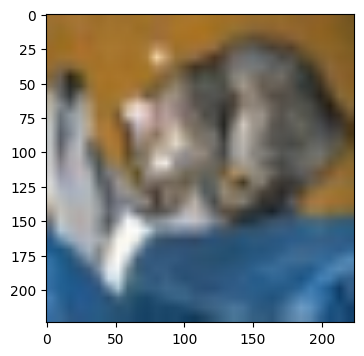

Actual: cat
Predicted: cat


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(4,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(images[0])

output = model(images[0].unsqueeze(0).to(device))
_, predicted = torch.max(output, 1)

print("Actual:", classes[labels[0]])
print("Predicted:", classes[predicted])

In [ ]:
model.eval()   # set model to evaluation mode

correct = 0
total = 0

with torch.no_grad():   # no gradient calculation
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)          # forward pass
        _, predicted = torch.max(outputs, 1)  # predicted class

        total += labels.size(0)           # total samples
        correct += (predicted == labels).sum().item()  # correct predictions

accuracy = 100 * correct / total
print(f"Testing Accuracy: {accuracy:.2f}%")


Testing Accuracy: 91.62%
